# Geografische Aufteilung der bilateralen APD der Schweiz 1960 - 2016

Visualisierungen und Gedanken zu einem Datensatz der [DEZA]. 

von Ismael Lieberherr, 29.03.2018

[DEZA]: https://www.eda.admin.ch/content/dam/deza/de/documents/aktivitaeten-projekte/aktivitaeten/180126_apd_tableau_3_de.xlsx

### Inhalt
1. [Aufbereitung der Daten](#daten-aufbereitung)
  - Daten des DEZA
  - Bevölkerungsstatistik der Weltbank
2. [Beiträge pro Kontinent](#beiträge-pro-kontinent)
3. [Beiträge pro Land](#beiträge-pro-land)
4. [Totalbeiträge seit 1960](#totalbeiträge)
5. [Zusammenfassung](#zusammenfassung)

## 1. Aufbereitung der Daten <a class="anchor" id="daten-aufbereitung"></a>
Lade die nötigen Python packages.

In [1]:
import numpy as np
from collections import Counter
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

### 1.1 Daten des DEZA
Der Datensatz ist in einem öffentlich zugänglichen Excel-File auf der [DEZA website], und kann direkt vom Internet in einen Pandas DataFrame geladen werden.
 
[DEZA website]: https://www.eda.admin.ch/content/dam/deza/de/documents/aktivitaeten-projekte/aktivitaeten/180126_apd_tableau_3_de.xlsx

In [31]:
link = 'https://www.eda.admin.ch/content/dam/deza/de/documents/aktivitaeten-projekte/aktivitaeten/180126_apd_tableau_3_de.xlsx'
apd = pd.read_excel(link)
# Oder alternativ von einer Version auf dem Computer
# directory = './data/180126_apd_tableau_3_de.xlsx'
# apd = pd.read_excel(directory)

Einen ersten Einblick in die Struktur des Datensatzes, geben die ersten 3 Zeilen.

In [32]:
apd.head(3)

,Geografische Aufteilung der bilateralen APD der Schweiz nach Kontinenten und Ländern 1960 - 2016 (Mio. Fr.),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,Stand am 22.12.2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016


Entferne leere Zeilen. Füge Zeilen- und Spaltennamen hinzu.

In [33]:
apd.columns = [str(year) for year in apd.loc[2,:]]
apd.columns.name= "Jahre"
apd.index = [str(country) for country in apd.iloc[:,0]]
apd.index.name = "Länder"
apd = apd.iloc[3:-1,1:]

In [34]:
apd.head(3)

Jahre,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Länder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afrika,-,0.5,-,2.5,6.5,8.4,9.5,9.4,25.4,32,27.8,20.1,26.2,40.3,45.8,39,40.4,51,73.1,68.5,102.5,124,150.6,191.2,239.5,269.9,289.4,264.3,272,274.4,343.7,418.5,354.9,307.4,311.9,303.8,283.9,272.1,272,277.1,274.4,262.9,291.7,344.6,317.9,390.3,392.2,377.6,329,511.6,356.4,507,507,525.2,595.3,630,575
Mali,-,-,-,0,0.1,0.2,-,-,0.1,0,-,0,0,-,1.4,0.4,0.2,3,2.4,3.1,6.9,7.6,13,15.3,14.7,13.8,14.8,15,13.1,8.2,23.4,19.2,12.3,8.3,8.9,6.8,6.9,10.9,9.3,9,12.9,8.3,12.3,11.8,11.1,16.2,13,13.8,11.9,15.3,19.3,22.9,23.1,27.4,32.4,33,32.9
Burkina Faso,-,-,-,0,0.1,0,0.1,0,0.3,0.3,0,0.2,0.3,1.1,1.3,1.6,1.4,7.1,5.2,2.8,3.3,4.3,3.3,6.1,5.9,4.6,4.9,4.6,6,7.4,6.9,7.6,9.2,10.9,17.8,14.5,18.4,18.1,11.7,21.5,19.4,21.7,24.8,27.7,25.4,25.9,26.1,24.4,24.2,25.7,29.4,26.7,34.9,35.8,29.7,37,34.8


Weiter zu verbessern:

1. **Nullwerte** sind manchmal markiert als "-". Ersetze diese mit Nullen.
2. Das Excel-File wiederholt der Übersicht zuliebe zwischendurch die **Jahreszahlen**. Dies ist hier nicht nötig.
3. Das Excel-File enthält **Zwischensummen** für jeden Kontinent. Die Zeilen "Afrika", "Asien", "Lateinamerika", "Asien", "Globale Beiträge" und "Total" werden in einem separaten DataFrame abgespeichert (```apd_totals```).
4. Die Länder im Excel-File sind nach Kontinenten. Diese Information wird in einem separaten DataFrame gespeichert (```metadata```).
5. Einige Werte enthalten eine **Fussnote** "a": "Inklusive bilaterale Entschuldungsmassnahmen, welche im Rahmen der Vereinbarung des Pariser Klubs ausgehandelt wurden." Speichere die Fussnoten in einem separaten DataFrame (```entschuldung```) und ignoriere sie vorerst.

In [35]:
# 1.
apd = apd.replace(to_replace="-", value=0)
apd = apd.fillna(value=0)


In [36]:
# 2.
apd = apd.loc[apd.index != 'nan']

In [37]:
# Speichere die Information, welches Land zu welchem Kontinent gehört in einem separaten DataFrame
afrika = list(apd.loc['Afrika':'Lateinamerika',].index)[1:-1]
lateinamerika = list(apd.loc['Lateinamerika':'Asien',].index)[1:-1]
asia = list(apd.loc['Asien':'Europa',].index)[1:-1]
europa = list(apd.loc['Europa':'Total',].index)[1:-2]
kontinent = ["Afrika"]*len(afrika) + ["Lateinamerika"]*len(lateinamerika) + ["Asien"]*len(asia) + ["Europa"]*len(europa) + ["Globale"]
laender = afrika + lateinamerika + asia + europa + ["Globale Beiträge"]
metadata = pd.DataFrame(kontinent, index=laender)
metadata.columns = ["Kontinent"]
metadata = metadata[metadata.index.isin(['Andere Länder', 'Globale Beiträge', 'Regionale Projekte'])==False]

In [38]:
# 3. 
apd_totals = apd[apd.index.isin(['Afrika', 'Lateinamerika', 'Asien','Europa', 'Total', 'Globale Beiträge', 'Regionale Projekte', 'Andere Länder'])]
apd_totals.index.name = "Regionen"
apd = apd[apd.index.isin(['Afrika', 'Lateinamerika', 'Asien','Europa', 'Total', 'Andere Länder', 'Regionale Projekte', 'Globale Beiträge']) == False]


In [39]:
# 4. 
mit_entschuldung = []
for country in apd.index.tolist():
    if apd.loc[country].str.contains("a").fillna(False).any():
        mit_entschuldung.append(country)
        
entschuldung = apd.loc[mit_entschuldung]        

In [40]:
apd = apd.replace(to_replace="a", value="", regex=True)
apd = apd.astype(float)

### 1.2 Bevölkerungsstatistik der Weltbank

Weiter unten möchten wir die Beiträge an einzelne Länder mit deren Bevölkerungszahl vergleichen. Dazu importieren wir einen Datensatz der Weltbank https://data.worldbank.org/indicator/SP.POP.TOTL:

In [41]:
downloaded_csv = "./data/API_SP.POP.TOTL_DS2_en_csv_v2.csv"
popfile = pd.read_csv(downloaded_csv, skiprows=range(1, 4), header=1)
pop = popfile.iloc[:,4:].fillna(0).astype(int).replace(to_replace=0, value="NaN")
pop['country'] = popfile.iloc[:,0]
pop.index = popfile.iloc[:,1]

In [42]:
cols = pop.columns.tolist()
cols = cols[-1:] + cols[:-2]
pop = pop[cols]

In [43]:
# Lade einen Dictionary mit den deutschen Ländername und englischen Ländercodes
from country_codes import country_codes

In [44]:
metadata['Bev 2016'] = np.zeros(len(metadata.index.tolist()))
population = []

for country in metadata.index:
    if country in country_codes:
        code = country_codes[country]
        population.append(pop.loc[code]['2016'])
    else:
        print(country)
        
metadata['Bev 2016'] = population
# Keine Bevölkerungsdaten gibt es für Eritrea von 2016. Füge den letzen verfügbaren Wert von 2011 ein.
metadata.at['Eritrea', 'Bev 2016'] = 4474690

## 2. Beiträge pro Kontinent <a class="anchor" id="beiträge-pro-kontinent"></a>

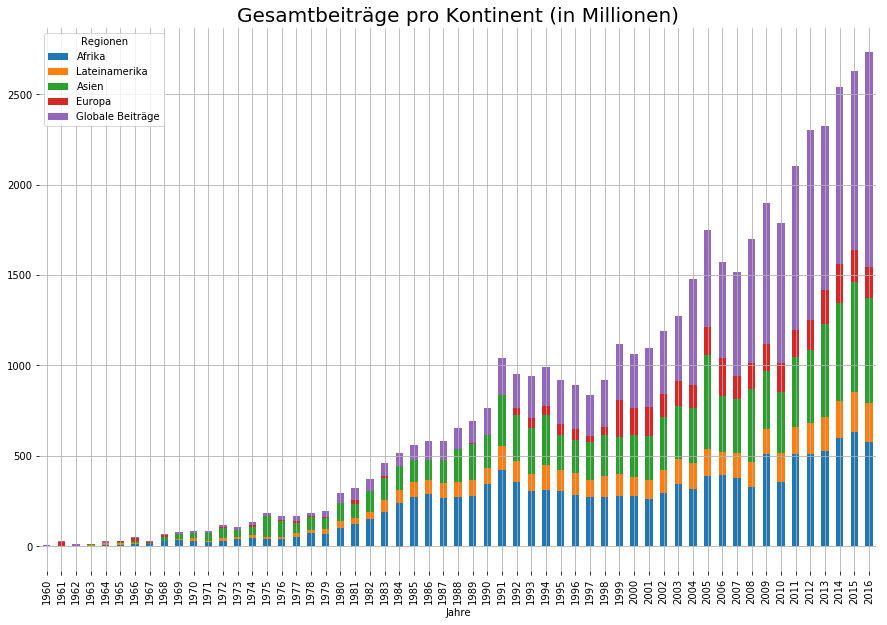

In [45]:
kontinente = ["Afrika", "Lateinamerika", "Asien", "Europa", "Globale Beiträge"]
ax = apd_totals.loc[kontinente].T.plot.bar(stacked=True, figsize=(15,10), grid=True)
ax.set_title("Gesamtbeiträge pro Kontinent (in Millionen)", fontsize=20)
sns.despine(bottom=True, left=True)

Das Total der Entwicklungshilfebeiträge nimmt seit 1960 mit einigen Ausnahmen kontinuierlich zu. Der relative Anteil der Kontinente wächst ungefähr proportional. Im Verhältnis stärker wachsen die globalen Beiträge und die Beiträge an europäische Länder. Einen klareren Überblick zu den Anteilen der Kontinente am Totalbetrag über die Jahre gibt die folgende Grafik.

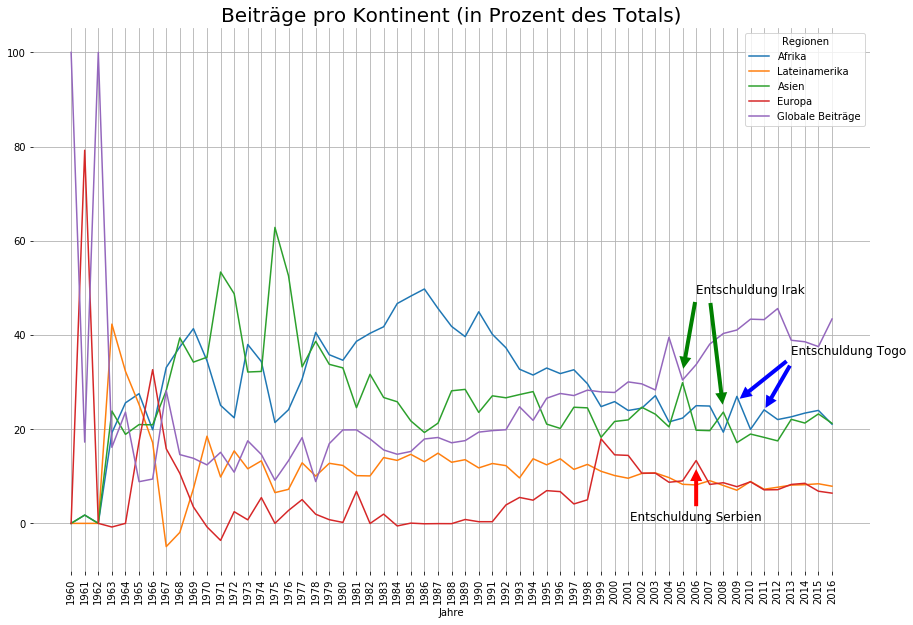

In [46]:
ax = (apd_totals.loc[kontinente]*100 / apd_totals.loc["Total"]).T.plot.line(figsize=(15,10),
                                                                  grid=True)
plt.xticks(np.arange(len(apd.columns)), apd.columns, rotation=90)
ax.set_title("Beiträge pro Kontinent (in Prozent des Totals)", fontsize=20)
ax.annotate('Entschuldung Irak', xy=(45, 32),  
            xytext=(50, 51), 
            arrowprops=dict(facecolor='green', lw=0, shrink=0.05),
            horizontalalignment='center', verticalalignment='top', fontsize=12
            
            )
ax.annotate('', xy=(48, 24),  
            xytext=(47, 48),
            arrowprops=dict(facecolor='green', lw=0, shrink=0.05),
            horizontalalignment='center', verticalalignment='top', fontsize=10
            )

ax.annotate('Entschuldung Togo', xy=(49, 26),  
            xytext=(53, 38), 
            arrowprops=dict(facecolor='blue', lw=0, shrink=0.05),
            horizontalalignment='left', verticalalignment='top', fontsize=12
            
            )
ax.annotate('', xy=(51, 24),  
            xytext=(53, 34), 
            arrowprops=dict(facecolor='blue', lw=0, shrink=0.05),
            horizontalalignment='center', verticalalignment='top', fontsize=12
            
            )
ax.annotate('Entschuldung Serbien', xy=(46, 12),  
            xytext=(46, 0), 
            arrowprops=dict(facecolor='red', lw=0, shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom', fontsize=12
            
            )
sns.despine(bottom=True, left=True)

In den 70er Jahren ging ein grosser Teil der Beiträge nach Asien, in einzelnen Jahren über 50 Prozent des gesamten Budgets. In den 80er und 90er Jahren verschob sich der Schwerpunkt nach Afrika, wobei die Beiträge für Afrika 2-3 mal höher waren als für Asien und Lateinamerika. Für Europa gab es in den 80er Jahren wenig bis gar keine Beiträge. Seit der Jahrtausendwende machen globale Beiträge den grössten Anteil aus. Die Beiträge für Asien und Afrika sind seither prozentual etwa ähnlich und doppelt so gross wie die Beiträge für Lateinamerika oder Europa. Ganz grob sind die Anteile in den letzten zehn Jahren ungefähr 40% Globale Beiträge, je 20% Afrika und Asien, je 10% Europa und Lateinamerika. Europa und Lateinamerika hatte ausser in einzelnen Jahren in den 60ern nie höchste Priorität. 

Oft machen Beiträge an einzelne Länder einen erheblichen Teil des Gesamtbudgets aus und sind gut sichtbar in der Kurve, so zum Beispiel die Entschuldungsmassnahmen für den Irak, Togo und Serbien. Im nächsten Abschnittt werden Beiträge an einzelne Länder weiter untersucht.

## 3. Beiträge pro Land <a class="anchor" id="beiträge-pro-land"></a>

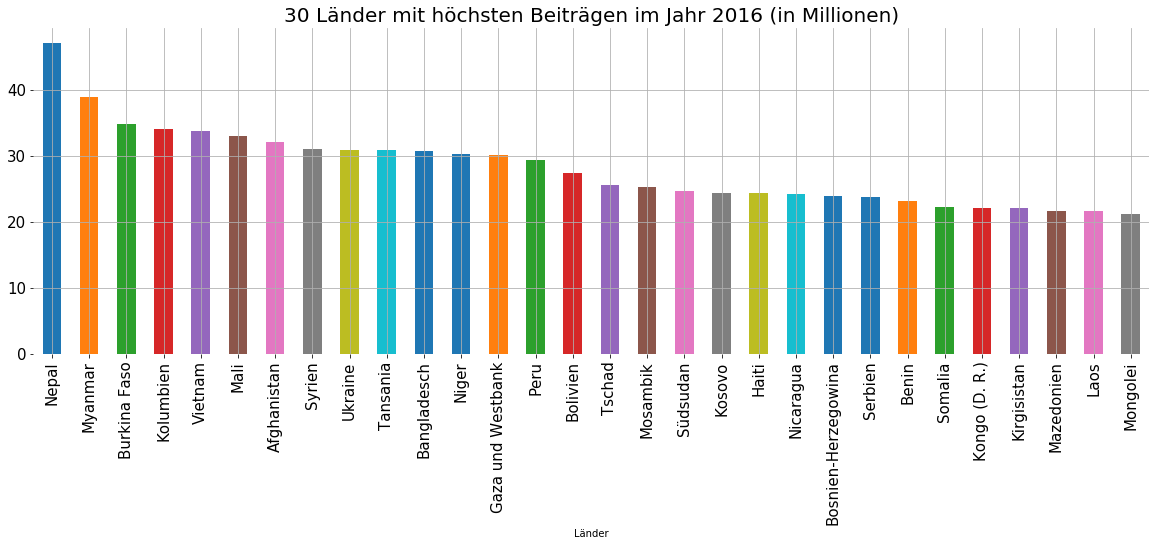

In [47]:
ax = apd['2016'].sort_values(ascending=False).head(30).plot.bar(figsize=(20,6), grid=True, fontsize=15)
ax.set_title("30 Länder mit höchsten Beiträgen im Jahr 2016 (in Millionen)", fontsize=20)
sns.despine(bottom=True, left=True)

Der grösste Betrag geht im Jahr 2016 nach Nepal. Dies ist zwar mit einem recht grossen Abstand von rund 8 Millionen Franken der grösste Betrag, der für ein einzelnes Land aufgewendet wird, ist aber nicht absolute Spitze vergleicht man den Betrag mit der Einwohnerzahl. Pro Person in Nepal investiert die Schweiz 2016 nämlich "nur" etwa 1.60 Fr, was rund acht mal weniger ist als der Betrag für den Kosovo (13.40 Fr. pro Einwohner).

In [48]:
pro_pers_nepal = apd['2016']['Nepal']*1000000/metadata['Bev 2016']['Nepal']
pro_pers_kosovo = apd['2016']['Kosovo']*1000000/metadata['Bev 2016']['Kosovo']
print("Franken pro Person in Nepal:\t %f" %pro_pers_nepal)
print("Franken pro Person im Kosovo:\t %f" %pro_pers_kosovo)

Franken pro Person in Nepal:	 1.621653
Franken pro Person im Kosovo:	 13.434644


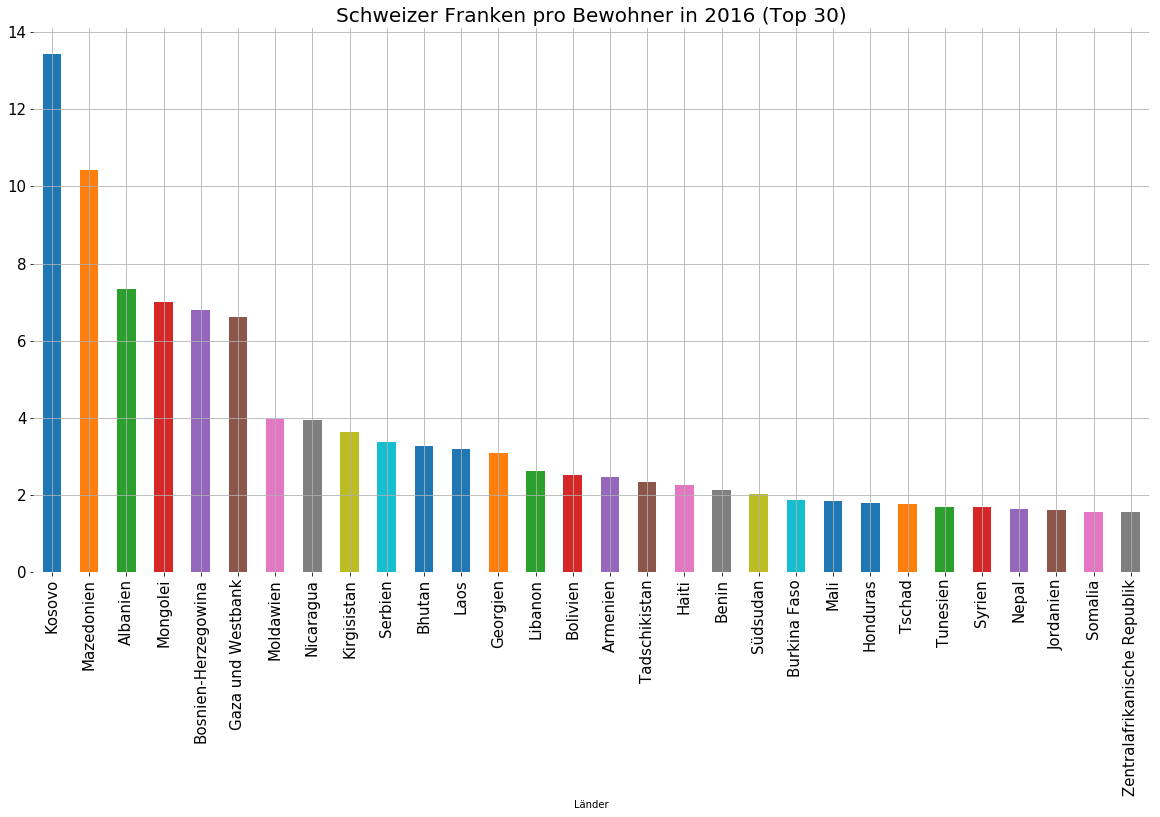

In [49]:
ax = (apd['2016']*1000000/metadata['Bev 2016'].astype(float)).sort_values(ascending=False).head(30).plot.bar(figsize=(20,10),
                                                                                              grid=True,
                                                                                                fontsize=15)
ax.set_title("Schweizer Franken pro Bewohner in 2016 (Top 30)", fontsize=20)
sns.despine(bottom=True, left=True)

Schaut man ausserdem die historische Entwicklung der Beiträge an verschiedene Länder an, sieht man dass Nepal nur in den Jahren 2015-2016 den höchsten Betrag erhielt, also die zwei Jahre nach dem verheerenden Erdbeben im Frühling 2016. Die folgende Grafik zeigt Länder, die seit 1960 mindestens in einem Jahr den höchsten Betrag erhielten.

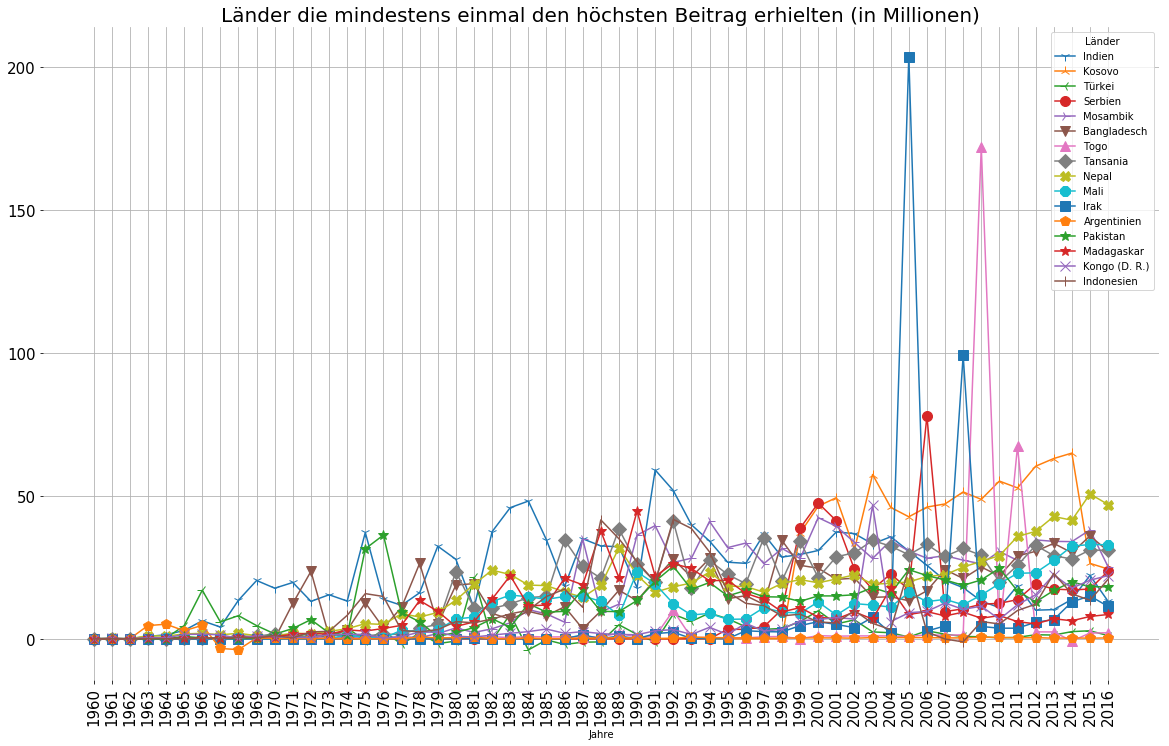

In [50]:
maxapd = []
maxapd_y = []

for year in apd.columns.tolist():
    maxapd.append(apd[year].idxmax())
    maxapd_y.append((year, apd[year].idxmax()))

maxapdd = Counter(maxapd)
sorted_maxapd = sorted([(maxapdd[x], x) for x in maxapdd], reverse=True)
maxapd_countries = [key[1] for key in sorted_maxapd]
style=['1-','2-','3-', 'o-', '4-', 'v-', '^-', 'D-', 'X-', '8-', 's-', 'p-','*-','*-', 'x-', '|-']
ax = apd.loc[maxapd_countries].T.plot.line(figsize=(20,12), grid=True,  style=style, fontsize=15,
                                                       ms=10)
plt.xticks(np.arange(len(apd.columns)), apd.columns, rotation=90)
ax.set_title("Länder die mindestens einmal den höchsten Beitrag erhielten (in Millionen)", fontsize=20)
sns.despine(bottom=True, left=True)

Die Gründe für die extremen Ausreisser, wie Togo [2009] und [2011] oder Irak [2005] und 2008, Serbien 2006 sind Abkommen zur Annulierung der Aussenschulden, die in diesen Jahren geschlossen wurden. 

[2005]: https://www.eda.admin.ch/eda/de/home/aussenpolitik/voelkerrecht/internationale-vertraege/datenbank-staatsvertraege/detailansicht-staatsvertrag.ggst0_97.contract99992920.html?_charset_=UTF-8 
[2009]: https://www.dfae.admin.ch/eda/en/home/foreign-policy/international-law/internationale-vertraege/datenbank-staatsvertraege/detailansicht-staatsvertrag.ggst0_9.contract99993559.html?_charset_=UTF-8
[2011]: https://www.dfae.admin.ch/eda/en/home/foreign-policy/international-law/internationale-vertraege/datenbank-staatsvertraege/detailansicht-staatsvertrag.ggst0_97.contract99994114.html?_charset_=UTF-8

Diese Länder erhielten in andern Jahre eher kleine Beiträge, wie die folgende Grafik zeigt.

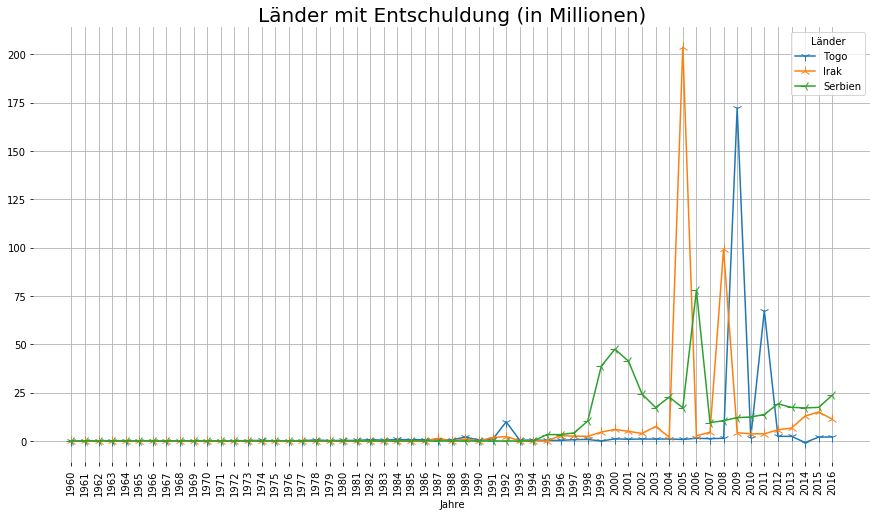

In [51]:
ax = apd.loc[['Togo', 'Irak', 'Serbien']].T.plot.line(figsize=(15,8), grid=True, 
                                                      style=style, fontsize=10,
                                                       ms=10)
plt.xticks(np.arange(len(apd.columns)), apd.columns, rotation=90)
ax.set_title("Länder mit Entschuldung (in Millionen)", fontsize=20)
sns.despine(bottom=True, left=True)

Die folgende Tabelle zeigt, wieviele Jahre einzelne Länder den höchsten Beitrag erhielt. An der Spitze ist mit grossem Abstand Indien.

| Land          | Anzahl Jahre |  Jahre         |
|---------------|-------|-----------|
| Indien        |    20 |1968-71, 1973-75, 1977, 1979-80, 1982-85, 1991-93, 1997, 2002 |
| Kosovo        |     8 | 2001, 2003-04, 2007, 2011-14          |
| Türkei        |     4 |1965-67, 1981           |
| Serbien       |     3 |1999-2000, 2007           |
| Mosambik      |     3 | 1994-96          |
| Bangladesch   |     3 |  1972, 1978         |
| Togo          |     2 | 2009, 2011 |
| Tansania      |     2 | 1986, 1989          |
| Nepal         |     2 | 2016-16          |
| Mali          |     2 |1960, 1962           |
| Irak          |     2 | 2005, 2008          |
| Argentinien   |     2 |   1963-64 |
| Pakistan      |     1 |      1976 |
| Madagaskar    |     1 |1990           |
| Kongo (D. R.) |     1 | 1961          |
| Indonesien    |     1 |  1988         |


## 4. Totalbeträge seit 1960 <a class="anchor" id="totalbeiträge"></a>

In [52]:
total_entwicklungshilfe = apd_totals.loc[kontinente].sum(axis=1).sum()/1000
print("Total Entwicklungshilfe seit 1960: %f Milliarden" %total_entwicklungshilfe)

Total Entwicklungshilfe seit 1960: 47.069500 Milliarden


### Totalbeträge pro Kontinent

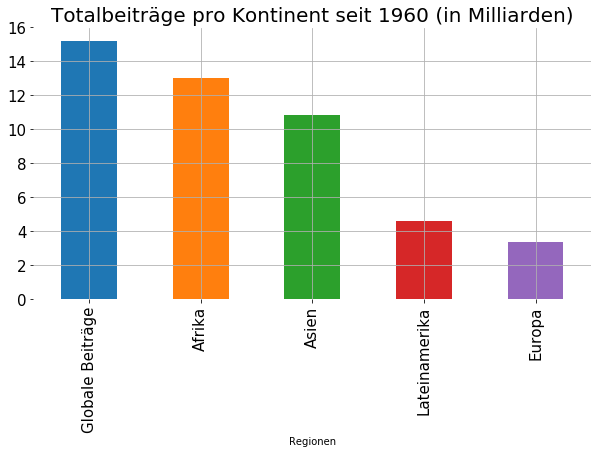

In [53]:
total_sum = apd_totals.loc[kontinente].sum(axis=1)
ax = (total_sum.sort_values(ascending=False)/1000).head(30).plot.bar(figsize=(10,5), grid= True, fontsize=15)
ax.set_title("Totalbeiträge pro Kontinent seit 1960 (in Milliarden)", fontsize=20)
sns.despine(bottom=True, left=True)

### Totalbeiträge pro Land 

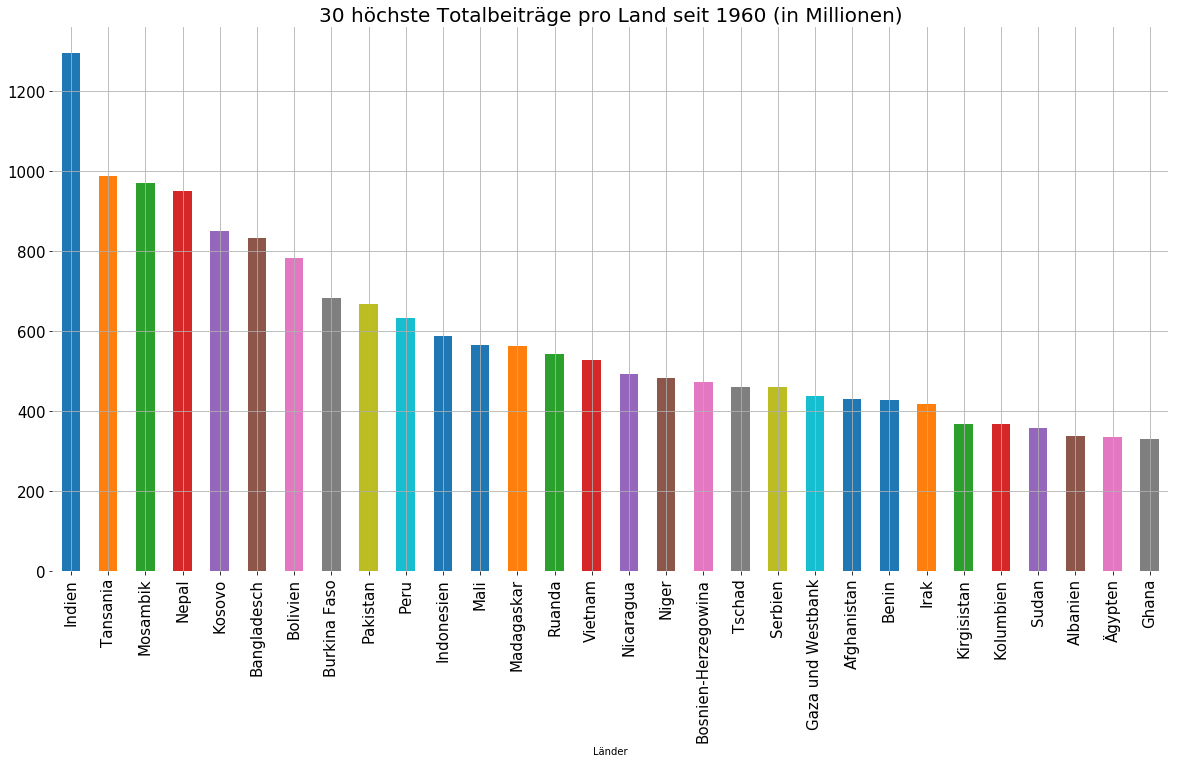

In [54]:
apd_sum = apd.sum(axis=1)
ax = apd_sum.sort_values(ascending=False).head(30).plot.bar(figsize=(20,10), grid= True, fontsize=15)
ax.set_title("30 höchste Totalbeiträge pro Land seit 1960 (in Millionen)", fontsize=20)
sns.despine(bottom=True, left=True)

Der grösste Gesamtbetrag seit 1960 wurde für Indien aufgewendet. Wiederum möchte man die Absolutbeträge in Relation zu einer andern Grösse vergleichen. Die Bevölkerung von Indien ist bekanntlich die zweitgrösste der Welt. Vergleicht man die Totalbeträge mit der heutigen Bevölkerung relativiert sich der Betrag. Die Totalinvestition der Schweiz für jede heute lebende Person in Indien seit 1960 ist nicht einmal ein Franken. Im angrenzenden Bhutan sind es rund 250 mal mehr.

In [55]:
tot_per_indian = apd_sum['Indien']*1000000/float(metadata['Bev 2016']['Indien'])
tot_per_bhutanese = apd_sum['Bhutan']*1000000/float(metadata['Bev 2016']['Bhutan'])
tot_per_kosovo = apd_sum['Kosovo']*1000000/float(metadata['Bev 2016']['Kosovo'])
print("Pro Person in Indien investiert seit 1960:\t %f Franken" %tot_per_indian)
print("Pro Person in Bhutan investiert seit 1960:\t %f Franken" %tot_per_bhutanese)
print("Pro Person im Kosovo investiert seit 1960:\t %f Franken" %tot_per_kosovo)

Pro Person in Indien investiert seit 1960:	 0.977366 Franken
Pro Person in Bhutan investiert seit 1960:	 251.327145 Franken
Pro Person im Kosovo investiert seit 1960:	 468.560731 Franken


Die folgende Grafik zeigt die Summe der Beiträge seit 1960 für jedes Land geteilt durch die Bevölkerungszahl. Einsame Spitze ist der Kosovo. Weit hinten in der Tabelle ist Indien.

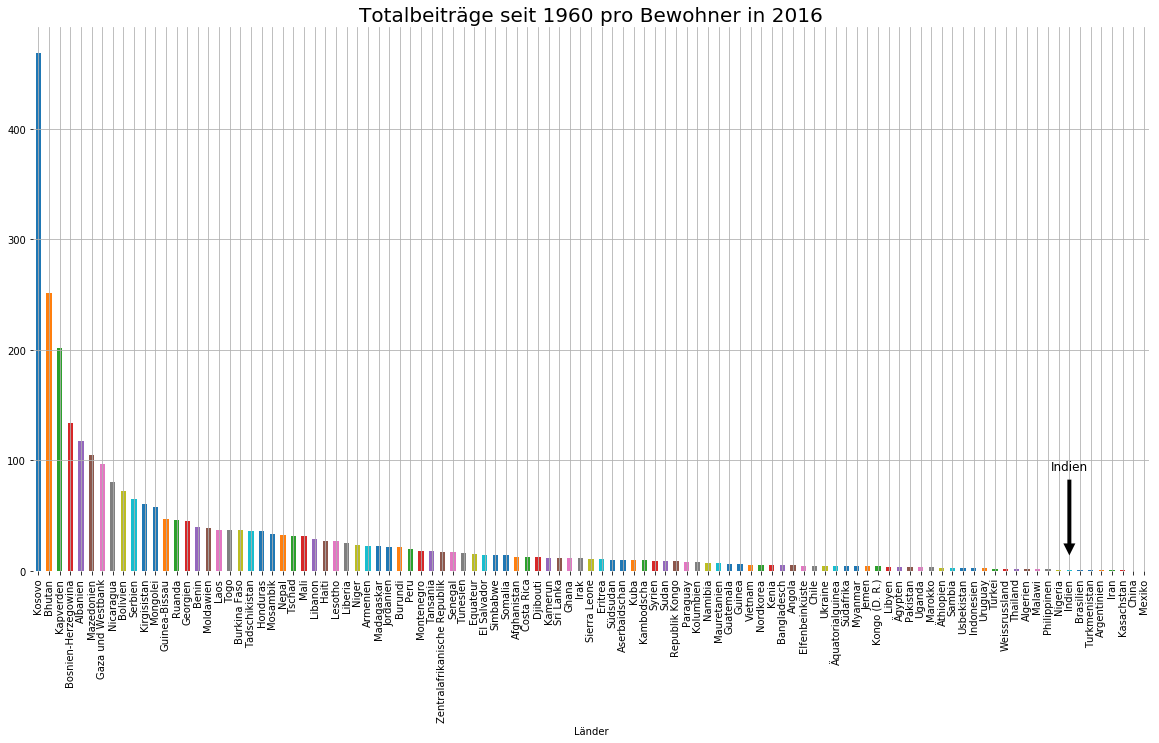

In [56]:
ax = (apd.sum(axis=1)*1000000/metadata['Bev 2016'].astype(float)).sort_values(ascending=False).plot.bar(figsize=(20,10), grid= True)
ax.set_title("Totalbeiträge seit 1960 pro Bewohner in 2016", fontsize=20)
ax.annotate('Indien', xy=(97, 10),  
            xytext=(97, 100), 
            arrowprops=dict(facecolor='black', lw=0, shrink=0.05),
            horizontalalignment='center', verticalalignment='top', fontsize=12        
            )
sns.despine(bottom=True, left=True)

Dies ist insbesondere bemerkenswert, als dass Kosovo als eigenes Land erst seit 1999 existiert und erst seit 20 Jahren Beiträge aus der Schweiz erhält. Die Beiträge an Bhutan verteilten sich über die letzten 40 Jahre, die Beiträge an Indien über die letzten 50 Jahre, wie die nächste Grafik zeigt.

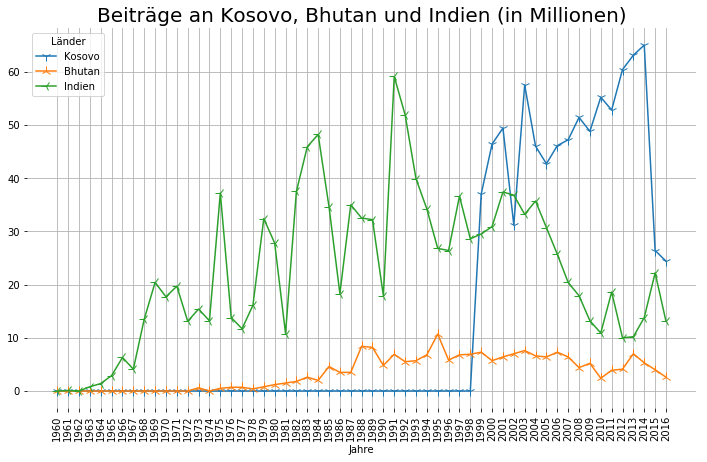

In [57]:
ax = apd.loc[['Kosovo', 'Bhutan', 'Indien']].T.plot.line(figsize=(12,7), grid=True,  style=style, fontsize=10,
                                                       ms=10)
plt.xticks(np.arange(len(apd.columns)), apd.columns, rotation=90)
ax.set_title("Beiträge an Kosovo, Bhutan und Indien (in Millionen)", fontsize=20)
sns.despine(bottom=True, left=True)

## 5. Zusammenfassung <a class="anchor" id="zusammenfassung"></a>

- Die Jahresausgaben für Entwicklungshilfe sind seit 1960 kontinuierlich angestiegen.
- Insgesamt wurden seit 1960 rund 47 Milliarden Franken für Entwicklungshilfe ausgegeben.
  - 15.2 Milliarden für globale Beiträge, 
  - 13 Milliarden für Afrika
  - 10.8 Milliarden für Asien
  - 4.6 Milliarden für Lateinamerika
  - 3.4 Milliarden für Europa
- Der Focus war in den 70er Jahren auf Asien, in den 80er und 90er Jahren auf Afrika. Momentan sind die Ausgaben für Afrika und Asien etwa gleich.
- Das Land mit den höchsten Totalbeiträgen ist Indien. Pro Kopf gerechnet wurde aber im Kosovo ein Vielfaches in der halben Zeit investiert.
- Beiträge an einzelne Länder können in einzelnen Jahren einen erheblichen Anteil des gesamten Jahresbudget ausmachen. Zum Beispiel Entschuldung des Irak 2005 rund 11 Prozent, oder die Entschuldung von Togo 2009 rund 9 Prozent der gesamten Jahresausgaben.

In [58]:
irak_2005_percent = 100*apd.loc['Irak']['2005']/apd_totals.loc['Total']['2005']
togo_2009_percent = 100*apd.loc['Togo']['2009']/apd_totals.loc['Total']['2009']
print("Anteil des Iraks an den Gesamtausgaben 2005:\t %f Prozent" %irak_2005_percent)
print("Anteil von Togo an den Gesamtausgaben 2009:\t %f Prozent" %togo_2009_percent)

Anteil des Iraks an den Gesamtausgaben 2005:	 11.665330 Prozent
Anteil von Togo an den Gesamtausgaben 2009:	 9.080847 Prozent


### Weitere Ideen zu diesem Datensatz
- Stelle die Daten auf einer Karte dar (mit Python *basemap*).
- Berücksichtige die Teuerung bei den Ausgaben in der Vergangenheit.
- Vergleiche die Beiträge der Schweiz mit dem Bruttoinlandprodukt der Länder.
- Vergleiche mit den Entwicklungshilfebeiträgen anderer Länder.
- ...